In [1]:
# Third-party
import astropy.coordinates as coord
from astropy.table import Table, join
import astropy.units as u
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import gala.coordinates as gc
import gala.dynamics as gd
import gala.potential as gp
from pyia import GaiaData

from helpers import galcen_frame, triand_color, a13_color

In [2]:
g_l17 = GaiaData('../data/Li2017-Gaia-master.fits')
g_s14 = GaiaData('../data/Sheffield2014-Gaia-master.fits')

In [47]:
c_l17 = g_l17.get_skycoord(distance=g_l17.apw_distance * u.kpc,
                           radial_velocity=g_l17.rv*u.km/u.s)
c_s14 = g_s14.get_skycoord(distance=g_s14.apw_distance * u.kpc,
                           radial_velocity=g_s14.rv*u.km/u.s)

g_s14 = g_s14[c_s14.velocity.norm() < 500*u.km/u.s]
c_s14 = c_s14[c_s14.velocity.norm() < 500*u.km/u.s]

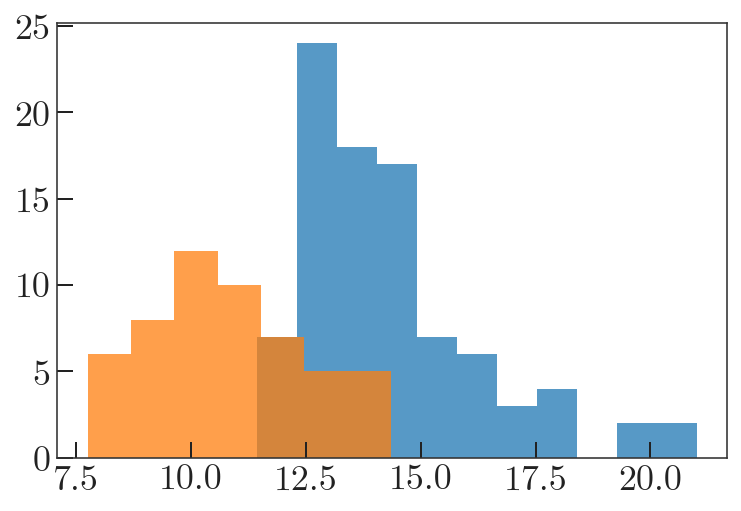

In [48]:
plt.figure(figsize=(6, 4))
plt.hist(c_s14.distance.kpc, bins='auto', alpha=0.75, color=triand_color)
plt.hist(c_l17.distance.kpc, bins='auto', alpha=0.75, color=a13_color);

In [49]:
c_ref_l17 = gc.reflex_correct(c_l17)
c_ref_s14 = gc.reflex_correct(c_s14)

gal_l17 = c_ref_l17.galactic
gal_s14 = c_ref_s14.galactic

galcen_l17 = c_l17.transform_to(galcen_frame)
galcen_s14 = c_s14.transform_to(galcen_frame)

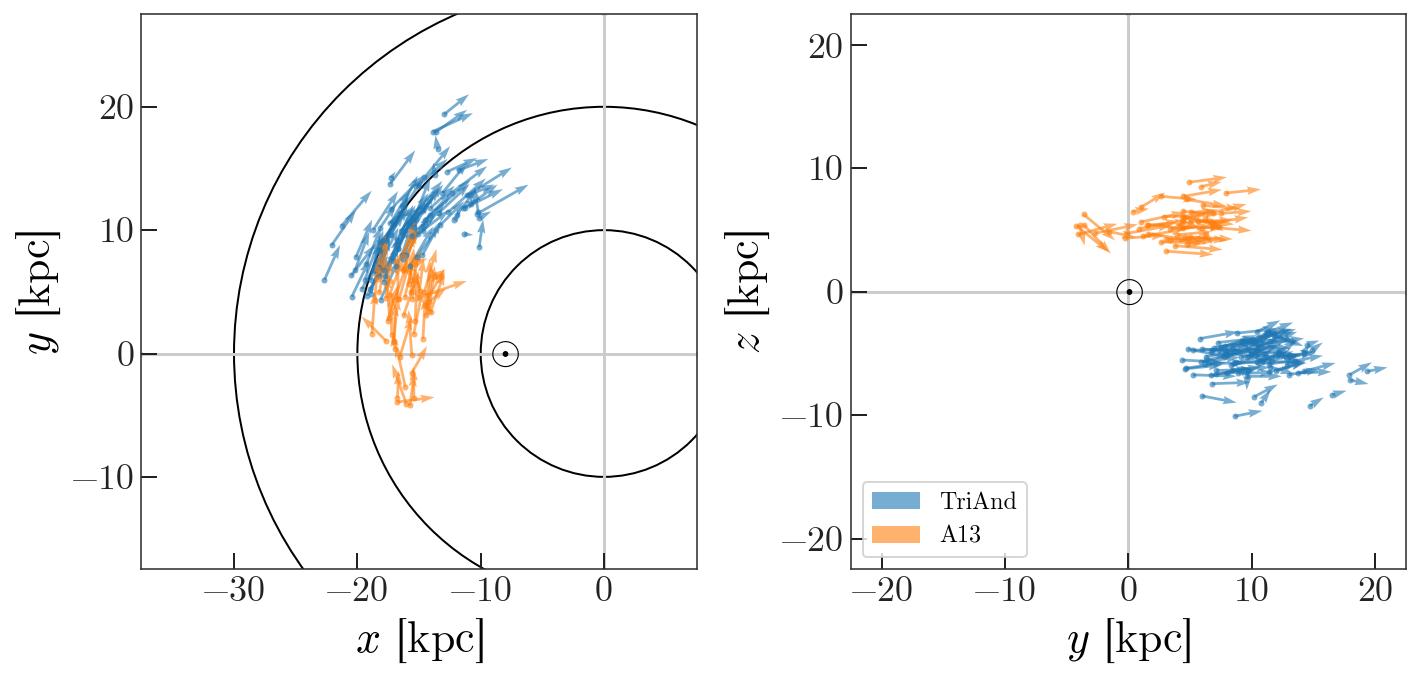

In [77]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))



for galcen, color, lbl in zip([galcen_s14, galcen_l17],
                              [triand_color, a13_color],
                              ['TriAnd', 'A13']):
    
    for i, xn, yn in [(0, 'x', 'y'), (1, 'y', 'z')]:
        axes[i].plot(getattr(galcen, xn).value,
                     getattr(galcen, yn).value,
                     marker='o', ls='none', 
                     color=color, ms=3, alpha=0.6)

        axes[i].quiver(getattr(galcen, xn).value,
                       getattr(galcen, yn).value,
                       getattr(galcen, 'v_'+xn).value,
                       getattr(galcen, 'v_'+yn).value,
                       scale=2.5e3, alpha=0.6,
                       color=color, width=5e-3,
                       label=lbl)


ax = axes[0] 
ax.text(-8.1, 0, '$\odot$', fontsize=20,
        ha='center', va='center')

ax.set_xlim(-37.5, 7.5)
ax.set_ylim(-17.5, 27.5)


ax = axes[1]
ax.text(0, 0, '$\odot$', fontsize=20,
        ha='center', va='center')

ax.set_xlim(-22.5, 22.5)
ax.set_ylim(-22.5, 22.5)


for ax in axes:
    ax.axhline(0, zorder=-100, color='#cccccc')
    ax.axvline(0, zorder=-100, color='#cccccc')

    
axes[0].set_xlabel('$x$ [kpc]')
axes[0].set_ylabel('$y$ [kpc]')

axes[1].set_xlabel('$y$ [kpc]')
axes[1].set_ylabel('$z$ [kpc]')

for r in [10, 20, 30]:
    circ = mpl.patches.Circle((0, 0), radius=r,
                              facecolor='none', 
                              edgecolor='k',
                              zorder=-100)
    axes[0].add_patch(circ)

fig.tight_layout()

axes[1].legend(loc='lower left', fontsize=12)

for ax in axes:
    ax.set_aspect('equal')
    
fig.savefig('../paper/figure-pos.pdf')